<a href="https://colab.research.google.com/github/nick880107-git/AI_Study-Works/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


數字是： 0


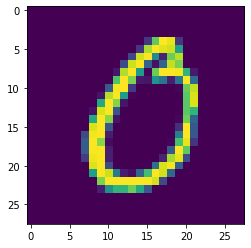

In [ ]:
plt.imshow(x_train[5888])
print("數字是：",y_train[5888])

In [ ]:
#改成灰階
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [ ]:
#變成純黑純白
x_train=x_train/255
x_test=x_test/255

In [ ]:
#處理類別資料(Onehot encoding)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
#宣告model是一個線性模型
model=Sequential()

In [ ]:
#加入卷積層 & 池化層
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#加入Dropout層，避免Overfitting
model.add(Dropout(0.25))

In [ ]:
#加入Flatten層
model.add(Flatten())

In [ ]:
#加入全連接層
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
#訓練模型
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100,batch_size=300,verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.4052 - accuracy: 0.8758 - val_loss: 0.0774 - val_accuracy: 0.9743
Epoch 2/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1166 - accuracy: 0.9655 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch 3/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0852 - accuracy: 0.9742 - val_loss: 0.0389 - val_accuracy: 0.9856
Epoch 4/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0677 - accuracy: 0.9798 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 5/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0275 - val_accuracy: 0.9908
Epoch 6/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0280 - val_accuracy: 0.9911
Epoch 7/100
60000/60000 [==============================] - 64s

KeyboardInterrupt: ignored